<a href="https://colab.research.google.com/github/raamav/Image-Classification/blob/master/CIFAR_10_CNN_(ver_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification Using CNNs (`CIFAR10` dataset)

The model architecture is *heavily inspired* from the Alexnet Architecture, the winner of Image Net competition in 2012. [more details in the Alexnet research paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) 

Alexnet comprises 5 convolutional layers followed by 3 fully connected layers.

In my case, I'll have `3 Convolutional layers`, each layer followed by a Maxpooling layer, which will be followed by `2 Dense layers` (one of which is an output layer)

### Result
The best model has 85% accuracy in the test set. This is much better than the peformance on the training and validation sets.

## Tl;Dr
The three reasons why the model generalised well:
1. Following an architecture that closely mimicks the `AlexNet` architecture
2. Tuning the learning rate of the `Adam` optimizer
3. Introducing `Dropouts` and having `smaller filters` throughout the model


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [3]:
# Getting Data

train = tfds.load('cifar10',split = 'train', shuffle_files = True)
#test = tfds.load('cifar10',split = 'test', shuffle_files = True)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incomplete67PZ1N/cifar10-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.0.incomplete67PZ1N/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.0. Subsequent calls will reuse this data.


In [0]:
# Getting Data

#train = tfds.load('cifar10',split = 'train', shuffle_files = True)
test = tfds.load('cifar10',split = 'test', shuffle_files = True)

In [4]:
type(train)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [0]:
# Converting it to Numpy array

train_gen = tfds.as_numpy(train)
test_gen = tfds.as_numpy(test)

In [11]:
type(sample)

generator

In [14]:
# for eg in sample:
#   print("Type and Shape of a generator object",type(eg), len(eg))
#   break


Type and Shape of a generator object <class 'dict'> 2


In [15]:
# eg['image'].shape

(32, 32, 3)

In [0]:
# Hard-coding now, find a better way later
m = 50000
m_t = 10000

In [0]:
X_train = np.zeros((m,32,32,3))
y_train = np.zeros((m,1))

X_test = np.zeros((m_t,32,32,3))
y_test = np.zeros((m_t,1))

In [0]:
# Checking the arrays
assert X_train.shape == (50000,32,32,3)
assert y_train.shape == (50000,1)

In [0]:
# Converting the generator to a numpy array -- Training Set

i = 0
for a in train_gen:
  X_train[i] = a['image']
  y_train[i] = a['label']
  i += 1

assert X_train.shape == (50000,32,32,3)
assert y_train.shape == (50000,1)

This is a proper win. HappyFace !

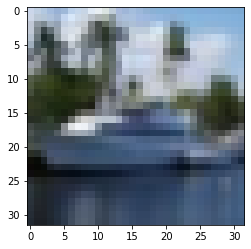

In [34]:
# Printing out a sample image
# I am having to do the casting because as a workaround to a pyplot legacy issue 
# discussion on stackoverflow: https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa

plt.imshow(X_train[1].astype('uint8'))


In [46]:
# Converting the generator to a numpy array -- Training Set

j = 0
for b in test_gen:
  X_test[j] = b['image']
  y_test[j] = b['label']
  j += 1

print(j)
assert X_test.shape == (m_t,32,32,3)
assert y_test.shape == (m_t,1)

0


In [47]:
X_test[1]

array([[[ 42.,  46.,  38.],
        [ 37.,  45.,  34.],
        [ 52.,  63.,  49.],
        ...,
        [233., 233., 232.],
        [215., 214., 211.],
        [173., 172., 166.]],

       [[ 54.,  58.,  48.],
        [ 42.,  49.,  40.],
        [ 37.,  46.,  38.],
        ...,
        [192., 188., 187.],
        [129., 125., 123.],
        [101.,  96.,  94.]],

       [[134., 138., 129.],
        [ 92., 100.,  90.],
        [ 31.,  41.,  29.],
        ...,
        [157., 142., 138.],
        [178., 169., 163.],
        [119., 118., 112.]],

       ...,

       [[ 60., 107.,  51.],
        [ 57., 102.,  52.],
        [ 47., 101.,  45.],
        ...,
        [ 39.,  97.,  52.],
        [ 36.,  94.,  49.],
        [ 37.,  95.,  50.]],

       [[ 64., 110.,  49.],
        [ 63., 109.,  54.],
        [ 59., 112.,  51.],
        ...,
        [ 51., 105.,  53.],
        [ 45.,  98.,  47.],
        [ 45.,  99.,  47.]],

       [[ 74., 121.,  57.],
        [ 66., 115.,  56.],
        [ 64., 1

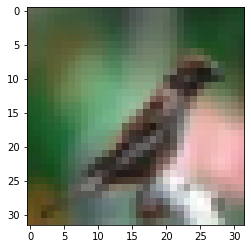

In [48]:
# Printing out a sample image
# I am having to do the casting because as a workaround to a pyplot legacy issue 
# discussion on stackoverflow: https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa

plt.imshow(X_test[1].astype('uint8'))


In [0]:
# Normalizing the Data

X_train = X_train/255.0
X_test = X_test/255.0

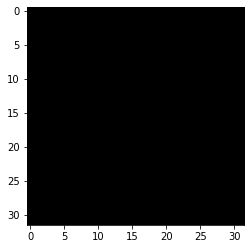

In [50]:
# How does the normalized data ook

plt.imshow(X_test[2].astype('uint8'))


The plan is to use the Keras Functional API

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

try out batch norm on 3rd dimension as ANG did (he used BN before implementing activation

In [0]:
# Defining the model architecture

input_point = keras.Input(shape = (32,32,3), name = "img")

x = layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = None)(input_point)
x = layers.BatchNormalization(axis = 3) (x)
x = layers.Activation(activation = "relu")(x)
x = layers.MaxPool2D(pool_size = 2) (x)

x = layers.Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = None)(x)
x = layers.BatchNormalization(axis = 3) (x)
x = layers.Activation(activation = "relu")(x)
x = layers.MaxPool2D(pool_size = 2) (x)

x = layers.Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = None)(x)
x = layers.BatchNormalization(axis = 3) (x)
x = layers.Activation(activation = "relu")(x)
x = layers.MaxPool2D(pool_size = 2) (x)

x = layers.Flatten() (x)

x = layers.Dense(1024, activation = 'relu')(x)
x = layers.BatchNormalization() (x)
x = layers.Dropout(rate = 0.15) (x)

x = layers.Dense(256, activation = 'relu')(x)
x = layers.BatchNormalization() (x)
x = layers.Dropout(rate = 0.15) (x)


output = layers.Dense(10, activation = "softmax") (x)

In [98]:
# Create Model and Print Out Archiecture

model = keras.Model(inputs = input_point, outputs = output, name = "AlexNet_sub" )

model.summary()

Model: "AlexNet_sub"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        

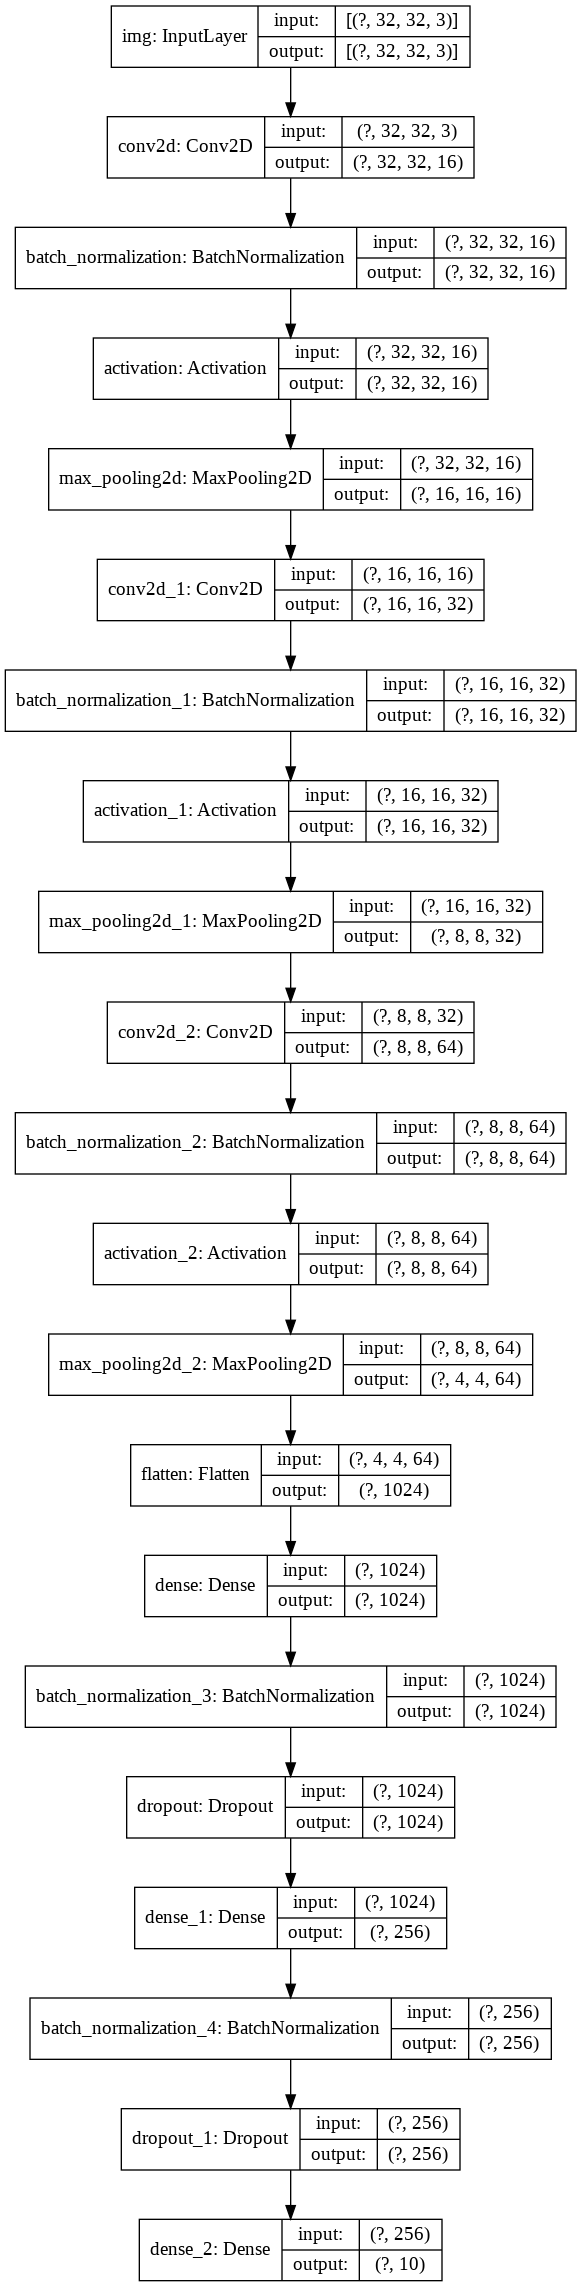

In [99]:
# Plotting the model architecture

keras.utils.plot_model(model, "cifar10_arch.png", show_shapes = True)


In [0]:
# Specifying Optimizer and Loss Functions 
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

loss = keras.losses.SparseCategoricalCrossentropy()

# IMPLEMENT CALLBACKS

checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10_best.h5",save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

In [0]:
# Compiling the Model

model.compile(optimizer = optimizer, 
                    loss = loss, 
                    metrics = ['accuracy'])

In [0]:
# Housekeeping

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [103]:
# Fitting the model

history = model.fit(X_train, y_train, epochs = 40,
                          validation_split = 0.15,
                          callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1329/1329 [==============================] - 12s 9ms/step - loss: 1.7041 - accuracy: 0.4188 - val_loss: 1.3063 - val_accuracy: 0.5377
Epoch 2/20
1329/1329 [==============================] - 11s 9ms/step - loss: 1.3285 - accuracy: 0.5302 - val_loss: 1.1803 - val_accuracy: 0.5825
Epoch 3/20
1329/1329 [==============================] - 12s 9ms/step - loss: 1.1948 - accuracy: 0.5790 - val_loss: 1.1352 - val_accuracy: 0.6016
Epoch 4/20
1329/1329 [==============================] - 12s 9ms/step - loss: 1.0967 - accuracy: 0.6141 - val_loss: 1.0774 - val_accuracy: 0.6211
Epoch 5/20
1329/1329 [==============================] - 12s 9ms/step - loss: 1.0179 - accuracy: 0.6394 - val_loss: 1.0627 - val_accuracy: 0.6263
Epoch 6/20
1329/1329 [==============================] - 12s 9ms/step - loss: 0.9615 - accuracy: 0.6616 - val_loss: 0.9993 - val_accuracy: 0.6505
Epoch 7/20
1329/1329 [==============================] - 12s 9ms/step - loss: 0.9099 - accuracy: 0.6767 - val_loss: 1.0024 - val_ac

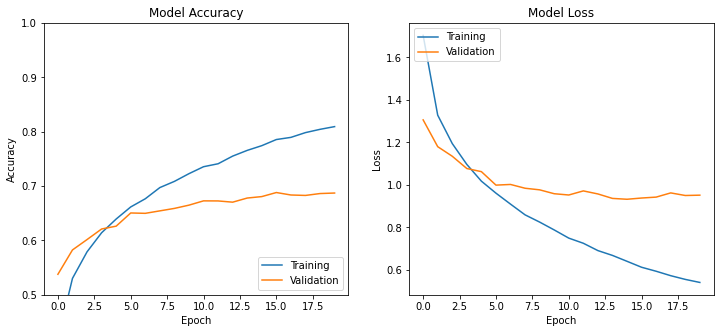

In [104]:
# BETTER LOOKING PLOTS FOR ACCURACY AND LOSS

import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_ylim([0.5,1])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Training', 'Validation'], loc='lower right')

axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Training', 'Validation'], loc='upper left')

In [105]:
# Inference on the best model
# LOADING THE BEST MODEL

best_model = keras.models.load_model('cifar10_best.h5')

best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4413 - accuracy: 0.8554


[0.44129467010498047, 0.855400025844574]